# Aula 6 (04/11/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

## Obter segmentos de retas de imagens

---

## Detecção de linhas

### Transformada de Hough
Computacionalmente caro e nem sempre possue precisão, mas consegue fazer detecção de linhas. Utilização de uma tranformação de espaço para interpretação de parâmetros de linha.

Em cada pixel, é determinados todos os valors de parâmetros que posem ser gerados. Assim, é feito uma votação para cada possibilidade.  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

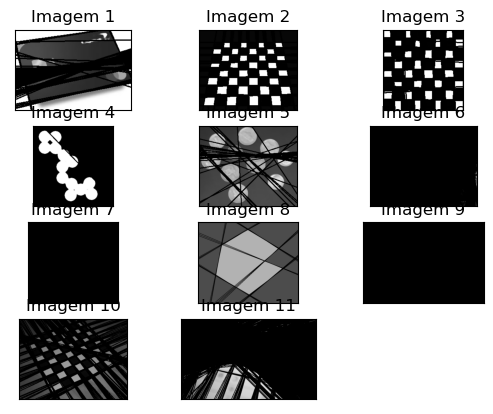

<Figure size 300x300 with 0 Axes>

In [60]:
# Carregar imagens 
imgs = []
img1 = cv2.imread('hough\cartao1.jpg')
imgs.append(img1)
img2 = cv2.imread('hough\chessboard_inclinada.jpg')
imgs.append(img2)
img3 = cv2.imread('hough\chessboard.jpg')
imgs.append(img3)
img4 = cv2.imread('hough\circles.jpg')
imgs.append(img4)
img5 = cv2.imread('hough\coins.jpg')
imgs.append(img5)
img6 = cv2.imread('hough\Fig1025(a)(building_original).jpg')
imgs.append(img6)
img7 = cv2.imread('hough\Fig1034(a)(marion_airport).jpg')
imgs.append(img7)
img8 = cv2.imread('hough\Fig1036(a)(original_septagon).jpg')
imgs.append(img8)
img9 = cv2.imread('hough\\fotolia_4351943_XS.jpg')
imgs.append(img9)
img10 = cv2.imread('hough\silicon_chess_board.jpg')
imgs.append(img10)
img11 = cv2.imread('hough\Sudoku-996946.jpg')
imgs.append(img11)

for i in range(11):
    imgs[i] = cv2.cvtColor(imgs[i],cv2.COLOR_BGR2GRAY)
    imgs[i] = cv2.medianBlur(imgs[i],(5))
    edges = cv2.Canny(imgs[i],50,150,apertureSize = 3) # Criar a detecção de bordas


    lines = cv2.HoughLines(edges,1,np.pi/180,40) # Aplicar Hough lines para a detecção de bordas

    # Desenhar as linhas encontradas
    for line in lines:
        
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(imgs[i],(x1,y1),(x2,y2),(0,0,255),2)

# Plotar todos os resultados
titles = ['Imagem 1', 'Imagem 2', 'Imagem 3', 'Imagem 4',
        'Imagem 5', 'Imagem 6', 'Imagem 7', 'Imagem 8', 
        'Imagem 9', 'Imagem 10', 'Imagem 11']
for i in range(11):
    imgs[i] = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB)
    plt.subplot(4,3,i+1),plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.figure(figsize=(3,3))
plt.show()




Nem sempre é possível identificar linhas com um threshold alto e, mesmo que ele seja modificado, o algoritmo exibe falsos positivos para imagens como a 4.